Dataset: https://github.com/prajnasb/observations/tree/master/experiements

In [1]:
import os
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd
from tensorflow.keras.models import load_model


/home/lexlabs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/lexlabs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/lexlabs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/lexlabs/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework

In [4]:
path_faces = "/home/lexlabs/experiments/"


In [11]:
try:
    os.mkdir(path_faces+"/training")
    os.mkdir(path_faces+"/testing")
    os.mkdir(path_faces+"/training/with_mask")
    os.mkdir(path_faces+"/training/without_mask")
    os.mkdir(path_faces+"/testing/with_mask")
    os.mkdir(path_faces+"/testing/without_mask")
except OSError:
    pass

In [12]:

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    images_to_copy = list(os.listdir(SOURCE))
    images_to_copy =  [file for file in images_to_copy if os.path.getsize(SOURCE+file)>0]
    number_images = len(images_to_copy)
    number_images_training = int(SPLIT_SIZE*number_images)
    images_to_copy_shuffled = random.sample(images_to_copy, len(images_to_copy))

    for image in images_to_copy_shuffled[0:number_images_training]:
        copyfile(SOURCE+image, TRAINING+image)
    for image in images_to_copy_shuffled[number_images_training:]:
        copyfile(SOURCE+image, TESTING+image)
        
        

WITH_MASK_SOURCE_DIR = path_faces+"with_mask/"
TRAINING_WITH_MASK_DIR = path_faces+"/training/with_mask/"
TESTING_WITH_MASK_DIR = path_faces+"/testing/with_mask/"
WITHOUT_MASK_SOURCE_DIR = path_faces+"without_mask/"
TRAINING_WITHOUT_MASK_DIR =  path_faces+"/training/without_mask/"
TESTING_WITHOUT_MASK_DIR =  path_faces+"/testing/without_mask/"

split_size = .9
split_data(WITH_MASK_SOURCE_DIR, TRAINING_WITH_MASK_DIR, TESTING_WITH_MASK_DIR, split_size)
split_data(WITHOUT_MASK_SOURCE_DIR, TRAINING_WITHOUT_MASK_DIR, TESTING_WITHOUT_MASK_DIR, split_size)

In [13]:
print(len(os.listdir(TRAINING_WITH_MASK_DIR)))
print(len(os.listdir(TESTING_WITH_MASK_DIR)))
print(len(os.listdir(TESTING_WITHOUT_MASK_DIR)))
print(len(os.listdir(TRAINING_WITHOUT_MASK_DIR)))


621
69
69
617


In [14]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),input_shape=(150,150,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')

    

])

model.compile(optimizer=RMSprop(lr=0.001), loss='binary_crossentropy', metrics=['acc'])

In [15]:
TRAINING_DIR = path_faces+"/training/"
train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')


train_generator = train_datagen.flow_from_directory(
        TRAINING_DIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')

VALIDATION_DIR = path_faces+"/testing/"
validation_datagen = ImageDataGenerator(rescale=1./255.0)


validation_generator = validation_datagen.flow_from_directory(
        VALIDATION_DIR,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=10,
        class_mode='binary')




Found 1238 images belonging to 2 classes.
Found 138 images belonging to 2 classes.


In [16]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/20
124/124 [==============================] - 27s 215ms/step - loss: 0.6311 - acc: 0.7601 - val_loss: 0.1617 - val_acc: 0.9565
Epoch 2/20
124/124 [==============================] - 24s 192ms/step - loss: 0.3357 - acc: 0.8675 - val_loss: 0.0579 - val_acc: 0.9783
Epoch 3/20
124/124 [==============================] - 24s 190ms/step - loss: 0.2367 - acc: 0.9192 - val_loss: 0.0411 - val_acc: 0.9855
Epoch 4/20
124/124 [==============================] - 24s 190ms/step - loss: 0.1970 - acc: 0.9273 - val_loss: 0.0366 - val_acc: 0.9928
Epoch 5/20
124/124 [==============================] - 24s 196ms/step - loss: 0.2247 - acc: 0.9426 - val_loss: 0.0309 - val_acc: 0.9928
Epoch 6/20
124/124 [==============================] - 23s 185ms/step - loss: 0.1744 - acc: 0.9418 - val_loss: 0.0229 - val_acc: 0.9928
Epoch 7/20
124/124 [==============================] - 23s 186ms/step - loss: 0.1611 - acc: 0.9459 - val_loss: 0.1294 - val_acc: 0.9275
Epoch 8/20
124/124 [==============================] - 2

Text(0.5,1,'Training and validation loss')

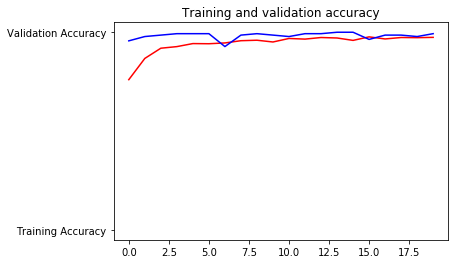

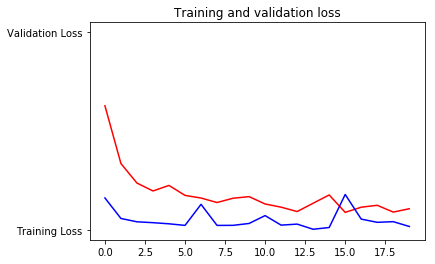

In [17]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

# Desired output. Charts with training and validation metrics. No crash :)

In [42]:
model.save("model-tf-keras-covid-detection.h5")